<a href="https://colab.research.google.com/github/mphfernando/Bitcoin-Price-Prediction/blob/main/Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas matplotlib scikit-learn

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Download daily OHLC data for BTC-USD from 2017 to today
btc_data = yf.download('BTC-USD', start='2019-01-01', end='2025-08-10', interval='1d')

# Display top rows
print(btc_data.head())

/tmp/ipython-input-1190875175.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_data = yf.download('BTC-USD', start='2019-01-01', end='2025-08-10', interval='1d')
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker          BTC-USD      BTC-USD      BTC-USD      BTC-USD     BTC-USD
Date                                                                      
2019-01-01  3843.520020  3850.913818  3707.231201  3746.713379  4324200990
2019-01-02  3943.409424  3947.981201  3817.409424  3849.216309  5244856836
2019-01-03  3836.741211  3935.685059  3826.222900  3931.048584  4530215219
2019-01-04  3857.717529  3865.934570  3783.853760  3832.040039  4847965467
2019-01-05  3845.194580  3904.903076  3836.900146  3851.973877  5137609824


In [4]:
# Check for any missing values in the DataFrame
print(btc_data.isnull().sum())

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64


In [5]:
btc_data

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990
2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836
2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219
2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467
2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824
...,...,...,...,...,...
2025-08-05,114141.445312,115117.437500,112701.109375,115072.187500,61039182286
2025-08-06,115028.000000,115737.835938,113372.250000,114140.914062,56379133510


In [6]:
from datetime import datetime, date

# Calculate the expected number of days
start_date = date(2019, 1, 1)
end_date = date(2025, 8, 9)
expected_days = (end_date - start_date).days + 1
print(f"Expected number of days: {expected_days}")

# Get the actual number of rows in the DataFrame
actual_rows = len(btc_data)
print(f"Actual number of rows: {actual_rows}")

# Compare the two numbers
if actual_rows == expected_days:
    print("All data points are available in the DataFrame.")
else:
    print(f"There are missing data points. Expected: {expected_days}, Actual: {actual_rows}")

Expected number of days: 2413
Actual number of rows: 2413
All data points are available in the DataFrame.


In [7]:
# Reset index to move 'Date' to a column
btc_data.reset_index(inplace=True)


# Save to CSV (optional)
btc_data.to_csv('btc_ohlc_data.csv', index=False)

In [8]:
btc_data['Return'] = btc_data['Close'].pct_change()

In [9]:
btc_data

Price,Date,Close,High,Low,Open,Volume,Return
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
0,2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990,NaN
1,2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836,0.025989
2,2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219,-0.027050
3,2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467,0.005467
4,2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824,-0.003246
...,...,...,...,...,...,...,...
2408,2025-08-05,114141.445312,115117.437500,112701.109375,115072.187500,61039182286,-0.008086
2409,2025-08-06,115028.000000,115737.835938,113372.250000,114140.914062,56379133510,0.007767
2410,2025-08-07,117496.898438,117676.906250,114279.710938,115030.054688,64051649681,0.021463


In [10]:
import numpy as np
btc_data['log_return'] = np.log(btc_data['Close'] / btc_data['Close'].shift(1))

In [11]:
btc_data

Price,Date,Close,High,Low,Open,Volume,Return,log_return
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
0,2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990,NaN,NaN
1,2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836,0.025989,0.025657
2,2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219,-0.027050,-0.027422
3,2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467,0.005467,0.005452
4,2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824,-0.003246,-0.003251
...,...,...,...,...,...,...,...,...
2408,2025-08-05,114141.445312,115117.437500,112701.109375,115072.187500,61039182286,-0.008086,-0.008119
2409,2025-08-06,115028.000000,115737.835938,113372.250000,114140.914062,56379133510,0.007767,0.007737
2410,2025-08-07,117496.898438,117676.906250,114279.710938,115030.054688,64051649681,0.021463,0.021236


In [12]:
btc_data['high_low'] = btc_data['High'] - btc_data['Low']

In [13]:
btc_data

Price,Date,Close,High,Low,Open,Volume,Return,log_return,high_low
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,
0,2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990,NaN,NaN,143.682617
1,2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836,0.025989,0.025657,130.571777
2,2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219,-0.027050,-0.027422,109.462158
3,2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467,0.005467,0.005452,82.080811
4,2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824,-0.003246,-0.003251,68.002930
...,...,...,...,...,...,...,...,...,...
2408,2025-08-05,114141.445312,115117.437500,112701.109375,115072.187500,61039182286,-0.008086,-0.008119,2416.328125
2409,2025-08-06,115028.000000,115737.835938,113372.250000,114140.914062,56379133510,0.007767,0.007737,2365.585938
2410,2025-08-07,117496.898438,117676.906250,114279.710938,115030.054688,64051649681,0.021463,0.021236,3397.195312


In [14]:
btc_data['close_open'] = btc_data['Close'] - btc_data['Open']

In [15]:
btc_data

Price,Date,Close,High,Low,Open,Volume,Return,log_return,high_low,close_open
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,
0,2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990,NaN,NaN,143.682617,96.806641
1,2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836,0.025989,0.025657,130.571777,94.193115
2,2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219,-0.027050,-0.027422,109.462158,-94.307373
3,2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467,0.005467,0.005452,82.080811,25.677490
4,2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824,-0.003246,-0.003251,68.002930,-6.779297
...,...,...,...,...,...,...,...,...,...,...
2408,2025-08-05,114141.445312,115117.437500,112701.109375,115072.187500,61039182286,-0.008086,-0.008119,2416.328125,-930.742188
2409,2025-08-06,115028.000000,115737.835938,113372.250000,114140.914062,56379133510,0.007767,0.007737,2365.585938,887.085938
2410,2025-08-07,117496.898438,117676.906250,114279.710938,115030.054688,64051649681,0.021463,0.021236,3397.195312,2466.843750


In [16]:
btc_data['SMA_5'] = btc_data['Close'].rolling(window=5).mean()
btc_data['SMA_20'] = btc_data['Close'].rolling(window=20).mean()

In [17]:
btc_data['EMA_5'] = btc_data['Close'].ewm(span=5, adjust=False).mean()

In [18]:
btc_data['volatility_5'] = btc_data['Return'].rolling(window=5).std()

In [19]:
# Check data types of btc_data
print(btc_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2413 entries, 0 to 2412
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Date, )           2413 non-null   datetime64[ns]
 1   (Close, BTC-USD)   2413 non-null   float64       
 2   (High, BTC-USD)    2413 non-null   float64       
 3   (Low, BTC-USD)     2413 non-null   float64       
 4   (Open, BTC-USD)    2413 non-null   float64       
 5   (Volume, BTC-USD)  2413 non-null   int64         
 6   (Return, )         2412 non-null   float64       
 7   (log_return, )     2412 non-null   float64       
 8   (high_low, )       2413 non-null   float64       
 9   (close_open, )     2413 non-null   float64       
 10  (SMA_5, )          2409 non-null   float64       
 11  (SMA_20, )         2394 non-null   float64       
 12  (EMA_5, )          2413 non-null   float64       
 13  (volatility_5, )   2408 non-null   float64       
dtypes: datet

In [20]:
btc_data

Price,Date,Close,High,Low,Open,Volume,Return,log_return,high_low,close_open,SMA_5,SMA_20,EMA_5,volatility_5
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,,
0,2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990,NaN,NaN,143.682617,96.806641,NaN,NaN,3843.520020,NaN
1,2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836,0.025989,0.025657,130.571777,94.193115,NaN,NaN,3876.816488,NaN
2,2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219,-0.027050,-0.027422,109.462158,-94.307373,NaN,NaN,3863.458062,NaN
3,2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467,0.005467,0.005452,82.080811,25.677490,NaN,NaN,3861.544551,NaN
4,2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824,-0.003246,-0.003251,68.002930,-6.779297,3865.316553,NaN,3856.094561,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2025-08-05,114141.445312,115117.437500,112701.109375,115072.187500,61039182286,-0.008086,-0.008119,2416.328125,-930.742188,113855.600000,117041.875391,114562.988792,0.014164
2409,2025-08-06,115028.000000,115737.835938,113372.250000,114140.914062,56379133510,0.007767,0.007737,2365.585938,887.085938,114197.182813,116828.783203,114717.992528,0.010128
2410,2025-08-07,117496.898438,117676.906250,114279.710938,115030.054688,64051649681,0.021463,0.021236,3397.195312,2466.843750,115191.179688,116803.466797,115644.294498,0.011034


In [21]:
# RSI pseudo-code
delta = btc_data['Close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
btc_data['RSI'] = 100 - (100 / (1 + rs))

In [22]:
btc_data

Price,Date,Close,High,Low,Open,Volume,Return,log_return,high_low,close_open,SMA_5,SMA_20,EMA_5,volatility_5,RSI
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,,,
0,2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990,NaN,NaN,143.682617,96.806641,NaN,NaN,3843.520020,NaN,NaN
1,2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836,0.025989,0.025657,130.571777,94.193115,NaN,NaN,3876.816488,NaN,NaN
2,2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219,-0.027050,-0.027422,109.462158,-94.307373,NaN,NaN,3863.458062,NaN,NaN
3,2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467,0.005467,0.005452,82.080811,25.677490,NaN,NaN,3861.544551,NaN,NaN
4,2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824,-0.003246,-0.003251,68.002930,-6.779297,3865.316553,NaN,3856.094561,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2025-08-05,114141.445312,115117.437500,112701.109375,115072.187500,61039182286,-0.008086,-0.008119,2416.328125,-930.742188,113855.600000,117041.875391,114562.988792,0.014164,29.909676
2409,2025-08-06,115028.000000,115737.835938,113372.250000,114140.914062,56379133510,0.007767,0.007737,2365.585938,887.085938,114197.182813,116828.783203,114717.992528,0.010128,36.890955
2410,2025-08-07,117496.898438,117676.906250,114279.710938,115030.054688,64051649681,0.021463,0.021236,3397.195312,2466.843750,115191.179688,116803.466797,115644.294498,0.011034,47.327444


In [23]:
EMA_12 = btc_data['Close'].ewm(span=12, adjust=False).mean()
EMA_26 = btc_data['Close'].ewm(span=26, adjust=False).mean()
btc_data['MACD'] = EMA_12 - EMA_26
btc_data['Signal'] = btc_data['MACD'].ewm(span=9, adjust=False).mean()

In [24]:
btc_data['vol_change'] = btc_data['Volume'].pct_change()

In [25]:
btc_data['vol_SMA_5'] = btc_data['Volume'].rolling(5).mean()

In [26]:
btc_data

Price,Date,Close,High,Low,Open,Volume,Return,log_return,high_low,close_open,SMA_5,SMA_20,EMA_5,volatility_5,RSI,MACD,Signal,vol_change,vol_SMA_5
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,,,,,,,,,
0,2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990,NaN,NaN,143.682617,96.806641,NaN,NaN,3843.520020,NaN,NaN,0.000000,0.000000,NaN,NaN
1,2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836,0.025989,0.025657,130.571777,94.193115,NaN,NaN,3876.816488,NaN,NaN,7.968386,1.593677,0.212908,NaN
2,2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219,-0.027050,-0.027422,109.462158,-94.307373,NaN,NaN,3863.458062,NaN,NaN,5.611470,2.397236,-0.136256,NaN
3,2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467,0.005467,0.005452,82.080811,25.677490,NaN,NaN,3861.544551,NaN,NaN,5.374259,2.992640,0.070140,NaN
4,2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824,-0.003246,-0.003251,68.002930,-6.779297,3865.316553,NaN,3856.094561,NaN,NaN,4.128184,3.219749,0.059746,4.816970e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2025-08-05,114141.445312,115117.437500,112701.109375,115072.187500,61039182286,-0.008086,-0.008119,2416.328125,-930.742188,113855.600000,117041.875391,114562.988792,0.014164,29.909676,180.513206,1011.383912,0.705814,5.861744e+10
2409,2025-08-06,115028.000000,115737.835938,113372.250000,114140.914062,56379133510,0.007767,0.007737,2365.585938,887.085938,114197.182813,116828.783203,114717.992528,0.010128,36.890955,125.575657,834.222261,-0.076345,5.163437e+10
2410,2025-08-07,117496.898438,117676.906250,114279.710938,115030.054688,64051649681,0.021463,0.021236,3397.195312,2466.843750,115191.179688,116803.466797,115644.294498,0.011034,47.327444,278.051519,722.988113,0.136088,5.307052e+10


In [27]:
import pandas as pd

def create_features(btc_data):
    # Ensure Date column is datetime
    btc_data['Date'] = pd.to_datetime(btc_data['Date'])
    btc_data = btc_data.sort_values('Date')

    # Moving Averages
    btc_data['MA_7'] = btc_data['Close'].rolling(window=7).mean()      # 7-day moving average
    btc_data['MA_30'] = btc_data['Close'].rolling(window=30).mean()    # 30-day moving average

    # Rolling Standard Deviation (Volatility)
    btc_data['Volatility_7'] = btc_data['Close'].rolling(window=7).std()
    btc_data['Volatility_30'] = btc_data['Close'].rolling(window=30).std()

    # Lag Features (previous days' close prices)
    btc_data['Close_1day_ago'] = btc_data['Close'].shift(1)
    btc_data['Close_2days_ago'] = btc_data['Close'].shift(2)
    btc_data['Close_3days_ago'] = btc_data['Close'].shift(3)

    # Date Parts (Seasonality)
    btc_data['Year'] = btc_data['Date'].dt.year
    btc_data['Month'] = btc_data['Date'].dt.month
    btc_data['Day'] = btc_data['Date'].dt.day
    btc_data['DayOfWeek'] = btc_data['Date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

    # Cumulative Return
    btc_data['Cumulative_Return'] = (btc_data['Close'] / btc_data['Close'].iloc[0]) - 1

    return btc_data

In [28]:
btc_data = create_features(btc_data)

In [29]:
btc_data

Price,Date,Close,High,Low,Open,Volume,Return,log_return,high_low,close_open,...,Volatility_7,Volatility_30,Close_1day_ago,Close_2days_ago,Close_3days_ago,Year,Month,Day,DayOfWeek,Cumulative_Return
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,...,,,,,,,,,,
0,2019-01-01,3843.520020,3850.913818,3707.231201,3746.713379,4324200990,NaN,NaN,143.682617,96.806641,...,NaN,NaN,NaN,NaN,NaN,2019,1,1,1,0.000000
1,2019-01-02,3943.409424,3947.981201,3817.409424,3849.216309,5244856836,0.025989,0.025657,130.571777,94.193115,...,NaN,NaN,3843.520020,NaN,NaN,2019,1,2,2,0.025989
2,2019-01-03,3836.741211,3935.685059,3826.222900,3931.048584,4530215219,-0.027050,-0.027422,109.462158,-94.307373,...,NaN,NaN,3943.409424,3843.520020,NaN,2019,1,3,3,-0.001764
3,2019-01-04,3857.717529,3865.934570,3783.853760,3832.040039,4847965467,0.005467,0.005452,82.080811,25.677490,...,NaN,NaN,3836.741211,3943.409424,3843.520020,2019,1,4,4,0.003694
4,2019-01-05,3845.194580,3904.903076,3836.900146,3851.973877,5137609824,-0.003246,-0.003251,68.002930,-6.779297,...,NaN,NaN,3857.717529,3836.741211,3943.409424,2019,1,5,5,0.000436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2025-08-05,114141.445312,115117.437500,112701.109375,115072.187500,61039182286,-0.008086,-0.008119,2416.328125,-930.742188,...,1743.242334,3048.202284,115071.882812,114217.671875,112526.914062,2025,8,5,1,28.697112
2409,2025-08-06,115028.000000,115737.835938,113372.250000,114140.914062,56379133510,0.007767,0.007737,2365.585938,887.085938,...,1109.650335,2642.461007,114141.445312,115071.882812,114217.671875,2025,8,6,2,28.927774
2410,2025-08-07,117496.898438,117676.906250,114279.710938,115030.054688,64051649681,0.021463,0.021236,3397.195312,2466.843750,...,1584.700990,2195.187916,115028.000000,114141.445312,115071.882812,2025,8,7,3,29.570128


In [30]:
btc_data['MA_30']

,MA_30
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2408,116527.837500
2409,116752.109115
2410,117036.996615
2411,117215.735677


In [31]:
# Check which columns have NaN
print(btc_data.isna().sum())

# Drop all rows that contain any NaN values
btc_data_clean = btc_data.dropna().reset_index(drop=True)

# Check again to confirm
print(btc_data_clean.isna().sum())
print(f"Original rows: {len(btc_data)}, After dropping NaNs: {len(btc_data_clean)}")

Price              Ticker 
Date                           0
Close              BTC-USD     0
High               BTC-USD     0
Low                BTC-USD     0
Open               BTC-USD     0
Volume             BTC-USD     0
Return                         1
log_return                     1
high_low                       0
close_open                     0
SMA_5                          4
SMA_20                        19
EMA_5                          0
volatility_5                   5
RSI                           14
MACD                           0
Signal                         0
vol_change                     1
vol_SMA_5                      4
MA_7                           6
MA_30                         29
Volatility_7                   6
Volatility_30                 29
Close_1day_ago                 1
Close_2days_ago                2
Close_3days_ago                3
Year                           0
Month                          0
Day                            0
DayOfWeek       

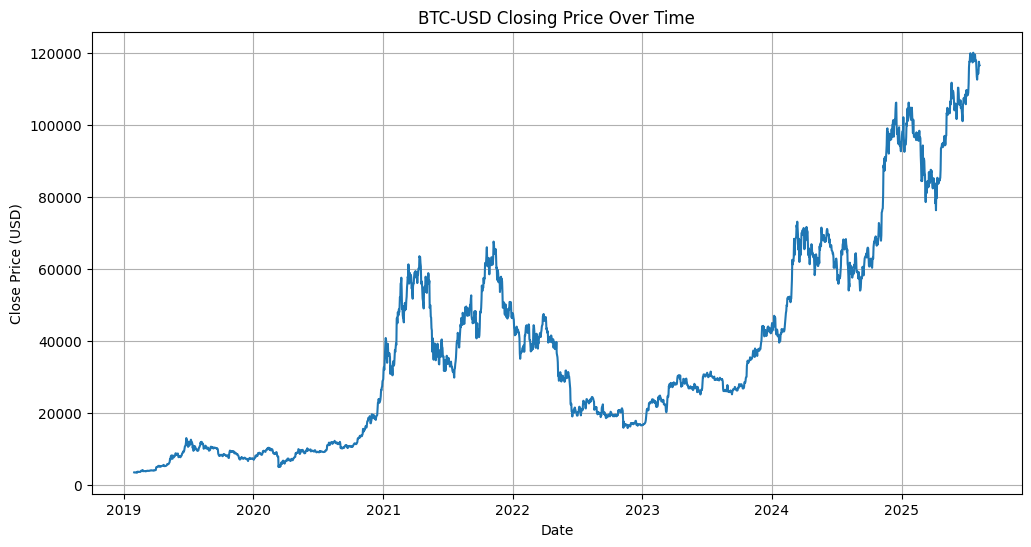

In [32]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(btc_data_clean['Date'], btc_data_clean['Close'])
plt.title('BTC-USD Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.show()

In [33]:
# Display summary statistics
display(btc_data_clean.describe())

Price,Date,Close,High,Low,Open,Volume,Return,log_return,high_low,close_open,...,Volatility_7,Volatility_30,Close_1day_ago,Close_2days_ago,Close_3days_ago,Year,Month,Day,DayOfWeek,Cumulative_Return
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,,,,...,,,,,,,,,,
count,2384,2384.000000,2384.000000,2384.000000,2384.000000,2.384000e+03,2384.000000,2384.000000,2384.000000,2384.000000,...,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000
mean,2022-05-05 12:00:00,38146.382069,38886.357387,37287.116329,38100.707284,3.234663e+10,0.002033,0.001477,1599.241058,45.674785,...,1101.479851,2271.118036,38098.960826,38051.469938,38003.687668,2021.855285,6.372064,15.694631,3.000839,8.924856
min,2019-01-30 00:00:00,3399.471680,3427.945557,3391.023682,3401.376465,5.004963e+09,-0.371695,-0.464730,18.922607,-8182.750000,...,11.785478,80.660605,3399.471680,3399.471680,3399.471680,2019.000000,1.000000,1.000000,0.000000,-0.115532
25%,2020-09-16 18:00:00,11673.016357,11881.808105,11319.819092,11647.831055,1.872076e+10,-0.012616,-0.012697,401.728027,-338.867676,...,302.691174,744.559028,11649.003906,11599.226807,11590.600586,2020.000000,3.000000,8.000000,1.000000,2.037064
50%,2022-05-05 12:00:00,30093.755859,30524.464844,29513.885742,30083.924805,2.821345e+10,0.000799,0.000798,1085.328857,11.352783,...,765.529107,1885.655214,30085.392578,30055.917969,30010.596680,2022.000000,6.000000,16.000000,3.000000,6.829738
75%,2023-12-22 06:00:00,57234.485352,58344.351562,55436.708008,57214.977539,4.017934e+10,0.015845,0.015720,2315.590332,424.231934,...,1640.971120,3268.824179,57207.676758,57114.101562,57035.994141,2023.000000,9.000000,23.000000,5.000000,13.891164
max,2025-08-09 00:00:00,119995.414062,123091.609375,118959.195312,119997.445312,3.509679e+11,0.187465,0.171821,12864.621094,8230.070312,...,6446.206716,11250.720172,119995.414062,119995.414062,119995.414062,2025.000000,12.000000,31.000000,6.000000,30.220187
std,NaN,28928.639615,29404.693409,28369.262368,28893.892546,1.997353e+10,0.033111,0.033468,1619.594553,1334.864652,...,1011.335310,1904.174574,28892.782203,28856.575887,28819.258121,1.902036,3.386985,8.814441,1.999370,7.526600


In [34]:
# Select only numerical columns for skewness and kurtosis calculation
numerical_cols = btc_data_clean.select_dtypes(include=['number'])

# Calculate skewness and kurtosis
print("Skewness:")
display(numerical_cols.skew())

print("\nKurtosis:")
display(numerical_cols.kurt())

Skewness:


,,0
Price,Ticker,
Close,BTC-USD,0.928527
High,BTC-USD,0.911057
Low,BTC-USD,0.948526
Open,BTC-USD,0.927617
Volume,BTC-USD,3.145520
Return,,-0.292766
log_return,,-1.081928
high_low,,1.956830
close_open,,0.198648



Kurtosis:


,,0
Price,Ticker,
Close,BTC-USD,0.056094
High,BTC-USD,0.008424
Low,BTC-USD,0.113436
Open,BTC-USD,0.055004
Volume,BTC-USD,30.681487
Return,,10.068015
log_return,,18.641924
high_low,,5.542696
close_open,,6.350593


In [35]:
X_train

NameError: name 'X_train' is not defined

In [ ]:


# Plotting
plt.figure(figsize=(14, 7))
plt.plot(btc_data_clean['Date'], btc_data_clean['Close'], label='Close Price', alpha=0.6)
plt.plot(btc_data_clean['Date'], btc_data_clean['MA_7'], label='7-Day MA', alpha=0.6)
plt.plot(btc_data_clean['Date'], btc_data_clean['MA_30'], label='30-Day MA', alpha=0.6)

plt.title('BTC-USD Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
btc_data_clean['MA_7']
btc_data_clean['MA_30']

In [ ]:
# Identify extreme values (possible outliers) using box plots
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.boxplot(btc_data_clean['Close'])
plt.title('Box plot of BTC-USD Closing Price')
plt.ylabel('Close Price (USD)')
plt.show()

plt.figure(figsize=(10, 5))
plt.boxplot(btc_data_clean['Volume'])
plt.title('Box plot of BTC-USD Volume')
plt.ylabel('Volume')
plt.show()

In [ ]:
import seaborn as sns

# Histogram of Close price
plt.figure(figsize=(10, 6))
sns.histplot(btc_data_clean['Close'], kde=True, bins=50)
plt.title('Distribution of BTC-USD Closing Price')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plotting Close Price to see trend
plt.figure(figsize=(14, 7))
plt.plot(btc_data_clean['Date'], btc_data_clean['Close'])
plt.title('BTC-USD Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.show()

# Plotting Volatility over time
plt.figure(figsize=(14, 7))
plt.plot(btc_data_clean['Date'], btc_data_clean['Volatility_7'])
plt.title('BTC-USD 7-Day Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (7-Day Std Dev)')
plt.grid(True)
plt.show()

# To visually check for seasonality, you could plot subsets of data
# For example, plotting the same month across different years
# Or plotting a typical year's data if you suspect yearly seasonality.
# This is more complex and might require resampling or further data manipulation.
# For now, the trend and volatility plots are good starting points.

In [ ]:
import matplotlib.pyplot as plt

# To visually check for seasonality, let's plot the closing price for a specific month across different years
btc_data_january = btc_data_clean[btc_data_clean['Date'].dt.month == 1]

plt.figure(figsize=(14, 7))
for year in btc_data_january['Date'].dt.year.unique():
    yearly_data = btc_data_january[btc_data_january['Date'].dt.year == year]
    plt.plot(yearly_data['Date'].dt.day, yearly_data['Close'], label=str(year))

plt.title('BTC-USD Closing Price in January Across Years')
plt.xlabel('Day of January')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'Date' is the index and the data is sorted by date
# If not, set 'Date' as index and sort
btc_data_clean_indexed = btc_data_clean.set_index('Date').sort_index()

# Decompose the 'Close' price series
# We'll use an additive model as the trend seems linear over long periods
# The frequency needs to be set based on the data's periodicity. Since it's daily data,
# and we're looking for yearly seasonality, a frequency of 365 might be appropriate,
# but it can be computationally intensive and might not work well with missing data
# (which we've handled by dropping rows, but it's still something to be mindful of).
# Let's try a smaller frequency first, or rely on auto-detection if possible.
# Given the error in the previous attempt with a specific frequency, let's try without
# specifying frequency and see if statsmodels can handle it, or use a commonly used
# value like 7 for weekly seasonality as a starting point if yearly is too complex.
# Let's try a frequency of 365 for yearly seasonality as initially intended.
decomposition = seasonal_decompose(btc_data_clean_indexed['Close'], model='additive', period=365)

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = btc_data_clean.corr(numeric_only=True)

# Access the 'Close' price series correctly using the MultiIndex
# Assuming 'Close' is at the first level and 'BTC-USD' is at the second level of the MultiIndex
close_correlations = correlation_matrix[('Close', 'BTC-USD')].sort_values(ascending=False)


print("Correlations with Close Price:")
display(close_correlations)

# Optional: Visualize the full correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of BTC-USD Data')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'Close' price
adf_test = adfuller(btc_data_clean['Close'])

# Print the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test[1] <= 0.05:
    print("\nResult: The time series is likely stationary (reject the null hypothesis).")
else:
    print("\nResult: The time series is likely non-stationary (fail to reject the null hypothesis).")

In [ ]:
# Apply first differencing to the 'Close' price to make it stationary
btc_data_clean['Close_diff'] = btc_data_clean[('Close', 'BTC-USD')].diff()

# Check the first few rows of the differenced data
print(btc_data_clean[['Close', 'Close_diff']].head())

# Perform the ADF test again on the differenced data to confirm stationarity
adf_test_diff = adfuller(btc_data_clean['Close_diff'].dropna())

print('\nADF Statistic (Differenced): %f' % adf_test_diff[0])
print('p-value (Differenced): %f' % adf_test_diff[1])
print('Critical Values (Differenced):')
for key, value in adf_test_diff[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if adf_test_diff[1] <= 0.05:
    print("\nResult: The differenced time series is likely stationary (reject the null hypothesis).")
else:
    print("\nResult: The differenced time series is likely non-stationary (fail to reject the null hypothesis).")

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(btc_data_clean['Close'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of BTC-USD Close Price')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(btc_data_clean['Close'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) of BTC-USD Close Price')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

features = btc_data_clean.drop(columns=['Date', 'Close'])  # predictors
target = btc_data_clean['Close']                           # what we want to predict

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)